<a href="https://colab.research.google.com/github/chinthanajanakadev/data-science/blob/main/rt_thickness_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving xray.jpg to xray.jpg


FloatText(value=0.0, description='Min mm:', step=0.1)

FloatText(value=6.0, description='Max mm:', step=0.1)

Button(description='Run Processing', style=ButtonStyle())

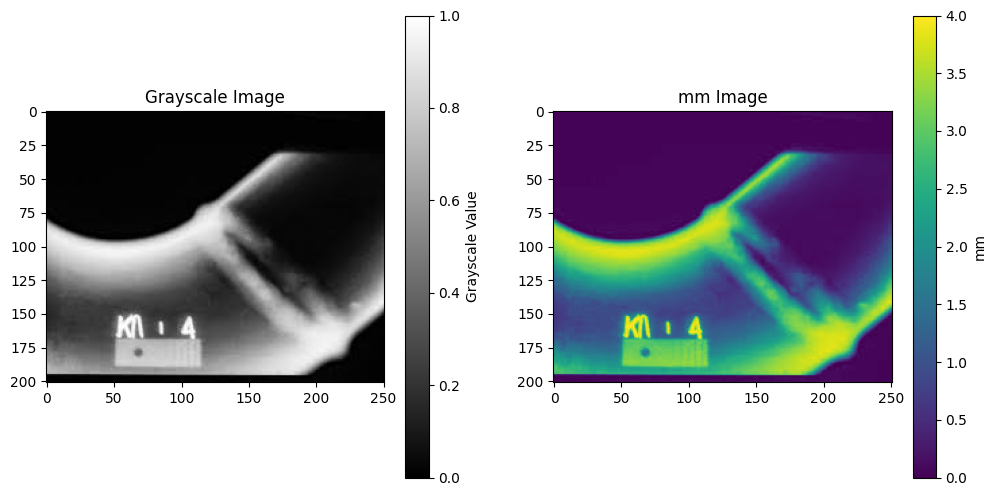

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from google.colab import files
from io import BytesIO
from PIL import Image

# File uploader widget
uploaded = files.upload()

# Get uploaded file name
file_name = list(uploaded.keys())[0]

# User input for min and max mm scale
min_mm = widgets.FloatText(value=0, description="Min mm:", step=0.1)
max_mm = widgets.FloatText(value=6, description="Max mm:", step=0.1)
run_button = widgets.Button(description="Run Processing")

# Display input fields
display(min_mm, max_mm, run_button)

def process_xray(_):
    # Load the image from uploaded file
    img = Image.open(BytesIO(uploaded[file_name]))
    img = np.array(img.convert("L"))  # Convert to grayscale

    # Normalize pixel intensities to the range [0, 1]
    img_normalized = cv2.normalize(img, None, 0, 1, cv2.NORM_MINMAX, cv2.CV_32F)

    # Map normalized intensities to user-defined mm scale
    img_mm = img_normalized * (max_mm.value - min_mm.value) + min_mm.value

    # Create colormaps
    cmap_gray = plt.cm.gray
    cmap_viridis = plt.cm.viridis

    # Create the figure and axes
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Display Grayscale image with gray legend
    im1 = axes[0].imshow(img_normalized, cmap=cmap_gray)
    fig.colorbar(im1, ax=axes[0], label='Grayscale Value')
    axes[0].set_title('Grayscale Image')

    # Display Grayscale image with mm legend
    im2 = axes[1].imshow(img_mm, cmap=cmap_viridis)
    fig.colorbar(im2, ax=axes[1], label='mm')
    axes[1].set_title('mm Image')

    plt.show()

# Attach function to button click
run_button.on_click(process_xray)
